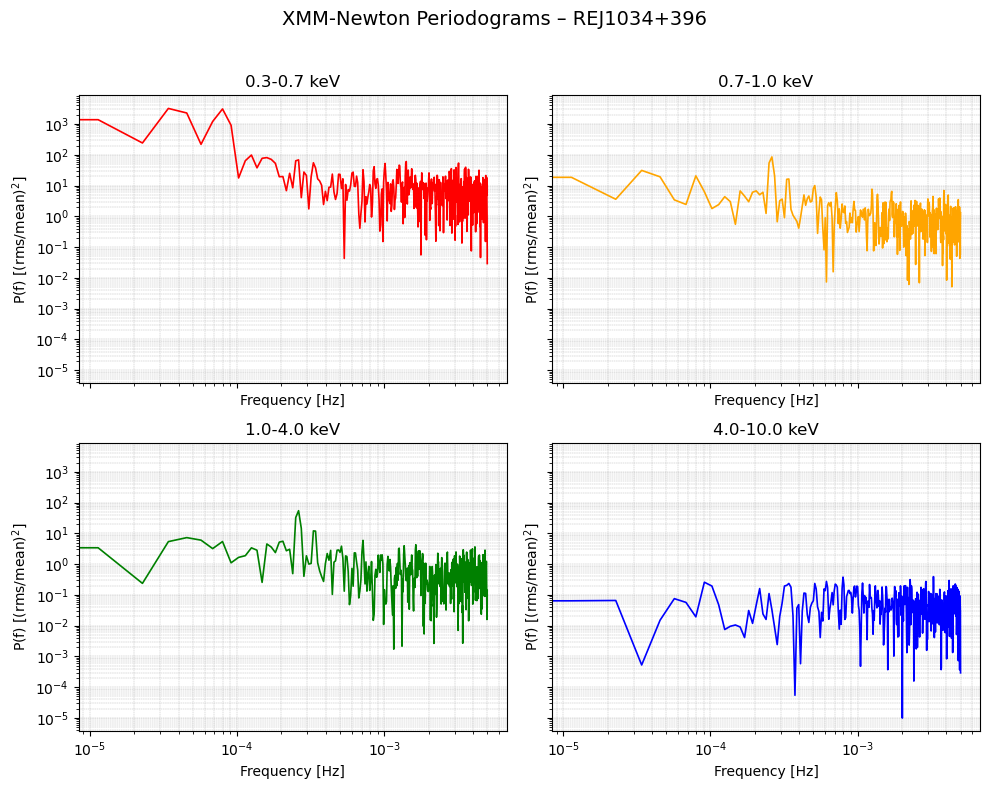

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

# Load the raw light curve file
file_path = "../data/ltcrv4bands_rej_dt100.dat"
raw_data = np.loadtxt(file_path)
dt = 100  # time resolution in seconds
fs = 1.0 / dt  # sampling frequency in Hz

# Band labels and colors
band_labels = ["0.3-0.7 keV", "0.7-1.0 keV", "1.0-4.0 keV", "4.0-10.0 keV"]
colors = ["red", "orange", "green", "blue"]

# Create 2×2 PSD subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(4):
    ax = axes[i]
    flux = raw_data[:, i]

    # Compute Power Spectral Density using Welch method
    f, Pxx = welch(flux, fs=fs, nperseg=len(flux))

    ax.plot(f, Pxx, color=colors[i], lw=1.2)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(band_labels[i])
    ax.set_xlabel("Frequency [Hz]")
    ax.set_ylabel(r"P(f) [(rms/mean)$^2$]")
    ax.grid(True, which="both", ls="--", lw=0.3)

plt.suptitle("XMM-Newton Periodograms – REJ1034+396", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

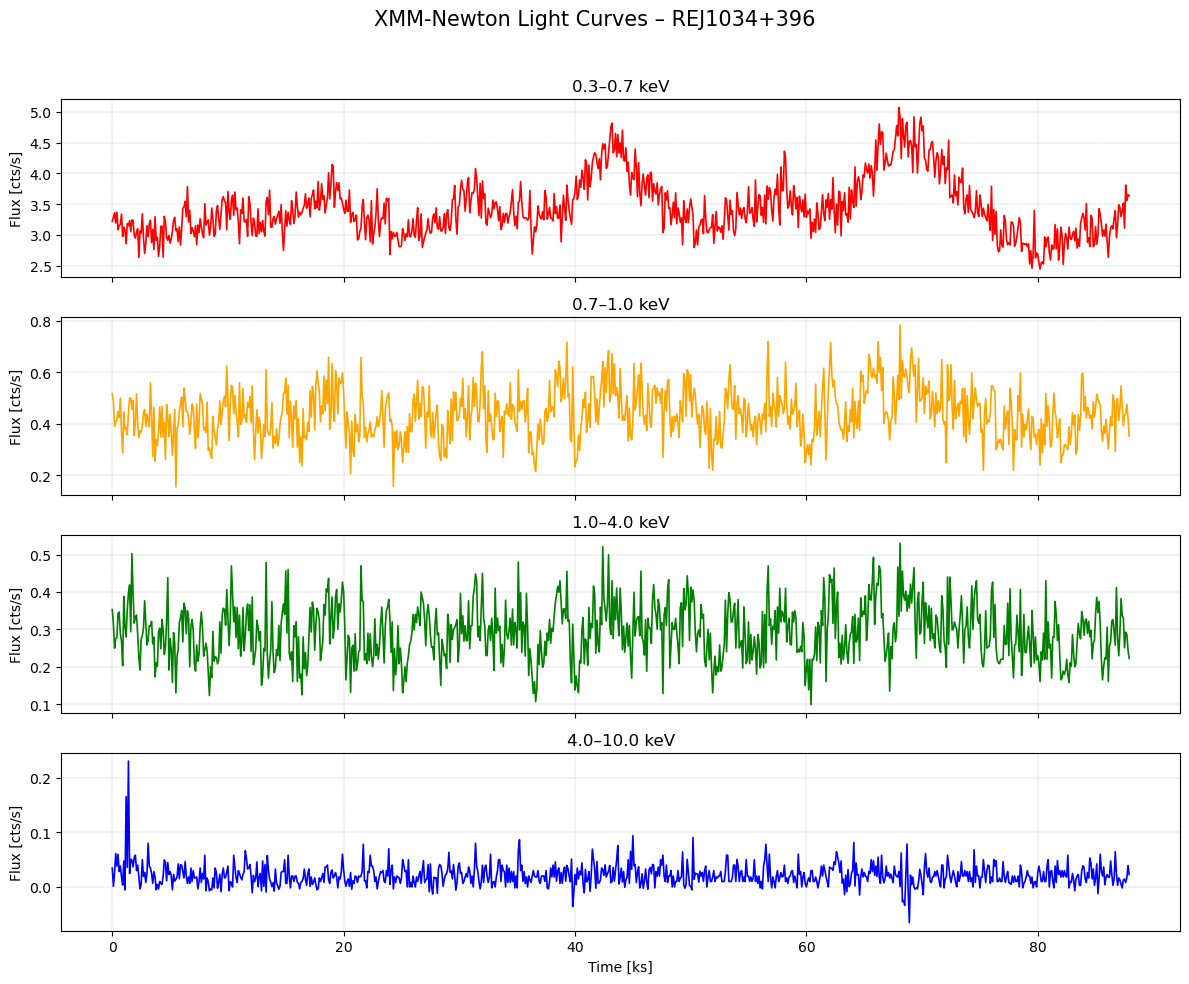

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load light curve data
file_path = "../data/ltcrv4bands_rej_dt100.dat"
raw_data = np.loadtxt(file_path)
dt = 100  # sec
time = np.arange(raw_data.shape[0]) * dt / 1000  # Convert to kiloseconds

# Band info
band_labels = [
    "0.3–0.7 keV", "0.7–1.0 keV", "1.0–4.0 keV", "4.0–10.0 keV"
]
colors = ["red", "orange", "green", "blue"]

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

for i in range(4):
    ax = axes[i]
    ax.plot(time, raw_data[:, i], color=colors[i], lw=1.2)
    ax.set_ylabel("Flux [cts/s]")
    ax.set_title(f"{band_labels[i]}")
    ax.grid(True, which="both", ls="--", lw=0.3)

axes[-1].set_xlabel("Time [ks]")
plt.suptitle("XMM-Newton Light Curves – REJ1034+396", fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
